# Coherent way of using the "RSSI" value in the emulator and the simulator

Author: Yann Charbon <yann.charbon@heig-vd.ch>

$BER_{FSK-non-coherent} = \frac{1}{2} e^{-\frac{1}{2}\frac{E_b}{N_0}}$

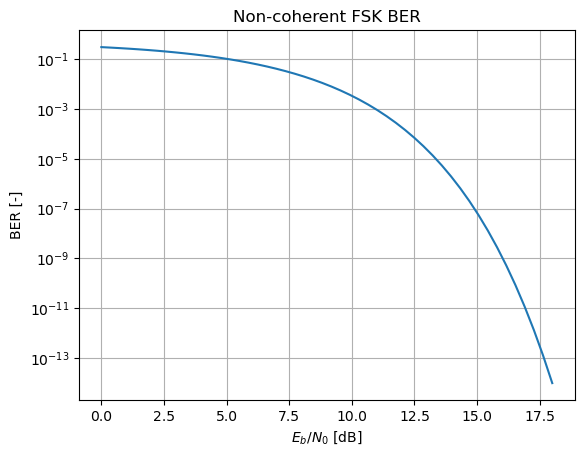

In [21]:
import matplotlib.pyplot as plt
import numpy as np

Eb_NO_db = np.linspace(0, 18)
Eb_NO = 10 ** (Eb_NO_db / 10)

BER = 1/2 * np.e ** (-1/2 * Eb_NO)

plt.plot(Eb_NO_db, BER)
plt.title("Non-coherent FSK BER")
plt.yscale("log")
plt.xlabel("$E_b / N_0$ [dB]")
plt.ylabel("BER [-]")
plt.grid(True,which="both", axis="both",ls="-")
plt.show()

Probability of transmission success of a frame of a given size $n_p$ (in bits) at a given BER

$P_{success} = (1 - BER)^{n_p}$

Maximum BER to ensure probability of transmission is above $P_{success min}$

$BER_{max} = 1 - \sqrt[n_p]{P_{successmin}}$

Corresponding minimum $E_b / N_0$

${\frac{E_b}{N_0}}_{min} = -2 \cdot \ln(2 \cdot BER_{max})$

In [ ]:

n_p = 104 * 8
P_successmin = 0.9
BER_max = 1 - P_successmin ** (1/n_p)
EbN0_min = -2 * np.log(2 * BER_max)
print(f"BER_max = {BER_max}")
print(f"Eb / N0 min = {EbN0_min}")

BER_max = 0.0001266272172627536
Eb / N0 min = 17.034386382832476


Estimating RSSI from $E_b / N_0$

$RSSI \approx P_{r​(dBm)} = N_{dBm} + SNR_{dB}$

Where $P_r$ is the required signal power, $N$ the noise power and $SNR$ the signal-to-noise ratio.

$SNR_{dB} = {E_b/N_0}_{dB} + 10\cdot \log_{10}​(\frac{B}{R_b})$

Where B = channel bandwidth [Hz], $R_b$ = bitrate [bit/s]

$N_{dBm} = N_{thermal} + N_{LNA} = 10 \cdot \log_{10}(kTB) + 30 + NF_{LNA}$

Where k is the Bolzman constant ($k = 1.3806 \cdot 10^{−23}$ [J/K]), T = temperature [K] and B the channel bandwith [Hz]

Finally

$RSSI \approx P_{r​(dBm)} = 10 \cdot \log_{10}(kTB) + 30 + NF_{LNA} + {E_b/N_0}_{dB} + 10\cdot \log_{10}​(\frac{B}{R_b})$



In [61]:
# Example numbers from https://www.st.com/resource/en/datasheet/s2-lp.pdf

k = 1.3806e-23
T = 295
B = 100000
Rb = 38400
Eb_NO = 7.82
NF_lna = 8

Pr = 10 * np.log10(k*T*B) + 30 + NF_lna + Eb_NO + 10 * np.log10(B/Rb)
print(Pr)


-103.92441339337083


Function to find directly RSSI from BER

$RSSI(BER) \approx P_{r​(dBm)}(BER) = 10 \cdot \log_{10}(kTB) + 30 + NF_{LNA} - 2 \cdot \ln(2 \cdot BER) + 10\cdot \log_{10}​(\frac{B}{R_b})$

Reverse function

$BER(P_r) = \frac{1}{2} e^{\frac{1}{2} (10 \cdot \log_{10}(kTB) + 30 + NF_{LNA} + 10\cdot \log_{10}​(\frac{B}{R_b} ) - P_{r})}$

where $P_{r} \approx RSSI$

In [67]:
Pr = -103.92
BER = 1/2 * np.e**(1/2 * (10 * np.log10(k*T*B) + 30 + NF_lna + 10 * np.log10(B/Rb) - Pr))
print(BER)
Pr = 10 * np.log10(k*T*B) + 30 + NF_lna - 2 * np.log(2*BER) + 10 * np.log10(B/Rb)
print(Pr)

0.009998163256129431
-103.92
